----

-----

# Factores de comportamiento en plataforma ecommerce


Para el cierre de 2024, tenemos como objetivo responder:

**¿Qué factores del comportamiento del cliente están más fuertemente asociados con el ingreso anual generado?**

> Este proyecto es un análisis **correlacional** (exploratorio).  
> **Correlación ≠ causalidad.**

## Sección 1 - Cargar y explorar el dataset

En esta sección validamos:
- que el dataset cargue correctamente
- tipos de datos
- valores faltantes / rangos generales

Antes de correlacionar, primero entendemos el “terreno”.

In [1]:
# Importar librerías
import pandas as pd
import numpy as np


### Cargar Dataset

In [2]:
# Cargar el dataset y explorar datos
df = pd.read_csv('/datasets/ecommerce_comportamiento_clientes_2024.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id_cliente                 15000 non-null  object 
 1   edad                       15000 non-null  float64
 2   nivel_ingreso              15000 non-null  float64
 3   visitas_mes                15000 non-null  int64  
 4   compras_mes                15000 non-null  int64  
 5   gasto_publicidad_dirigida  15000 non-null  float64
 6   satisfaccion               15000 non-null  float64
 7   miembro_premium            15000 non-null  int64  
 8   abandono                   15000 non-null  int64  
 9   tipo_dispositivo           15000 non-null  object 
 10  region                     15000 non-null  object 
 11  ingreso_anual              15000 non-null  float64
dtypes: float64(5), int64(4), object(3)
memory usage: 1.4+ MB


#### Descripción del conjunto de datos

El dataset contiene las siguientes columnas:

- `id_cliente` — Identificador único del cliente.
- `edad` — Edad del cliente.
- `nivel_ingreso` — Ingreso anual estimado del cliente.
- `visitas_mes` — Número de visitas a la aplicación o sitio web durante el mes.
- `compras_mes` — Número de compras realizadas en el mes.
- `gasto_publicidad_dirigida` — Gasto en anuncios asignado al usuario.
- `satisfaccion` — Calificación de satisfacción del cliente en una escala del 1 al 5.
- `miembro_premium` — Indica si el cliente tiene suscripción premium (1) o no (0).
- `abandono` — Indica si el cliente abandonó la plataforma (1) o no (0).
- `tipo_dispositivo` — Tipo de dispositivo utilizado por el cliente (móvil, escritorio o tablet).
- `region` — Región geográfica del cliente (norte, sur, oeste o este).
- `ingreso_anual` — Ingreso anual generado por el cliente para la empresa.

La métrica principal de análisis es `ingreso_anual`, utilizada para evaluar el impacto económico de los clientes.


In [3]:
# mostrar las primeras 5 filas
df.head(5)

,id_cliente,edad,nivel_ingreso,visitas_mes,compras_mes,gasto_publicidad_dirigida,satisfaccion,miembro_premium,abandono,tipo_dispositivo,region,ingreso_anual
0,CL-100000,44.0,28565.77,9,1,31.36,3.9,0,0,móvil,norte,23.22
1,CL-100001,36.0,29673.44,11,3,24.66,3.7,0,0,tablet,sur,93.47
2,CL-100002,46.0,30642.95,9,0,0.00,2.9,0,0,móvil,este,0.00
3,CL-100003,56.0,39468.61,8,0,6.81,3.1,0,0,móvil,este,0.00
4,CL-100004,35.0,22527.83,9,2,26.49,2.3,0,0,móvil,sur,33.76


## Sección 2 - Preparar datos y documentar supuestos

### Exploración y Limpieza

#### Exploración inicial de los datos
El conjunto de datos contiene **15,000 registros** y **12 columnas**, sin valores nulos.

**Variables numéricas**  
Se identifican las siguientes columnas numéricas:
- `edad`
- `nivel_ingreso`
- `visitas_mes`
- `compras_mes`
- `gasto_plublicidad_dirigida`
- `satisfaccion`
- `miembro_premium`
- `abandono`
- `ingreso_anual`

La mayoría de estas variables presentan tipos de datos adecuados.  


**Variables binarias**  
Las siguientes columnas representan variables binarias:
- `miembro_premium`
- `abandono`

Ambas están codificadas como 0 y 1, **no requieren transformación adicional**.

**Variables categóricas**  
Se identifican las siguientes columnas categóricas:
- `id_cliente`
- `tipo_dispositivo`
- `region`

Estas variables están correctamente definidas.

In [4]:
# Ratificación de tipos de dato
print('Tipo de dato de miembro_premium: ', df['miembro_premium'].dtype)
print('Tipo de dato de abandono: ', df['abandono'].dtype)


Tipo de dato de miembro_premium:  int64
Tipo de dato de abandono:  int64


In [5]:
# verificar cambios
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id_cliente                 15000 non-null  object 
 1   edad                       15000 non-null  float64
 2   nivel_ingreso              15000 non-null  float64
 3   visitas_mes                15000 non-null  int64  
 4   compras_mes                15000 non-null  int64  
 5   gasto_publicidad_dirigida  15000 non-null  float64
 6   satisfaccion               15000 non-null  float64
 7   miembro_premium            15000 non-null  int64  
 8   abandono                   15000 non-null  int64  
 9   tipo_dispositivo           15000 non-null  object 
 10  region                     15000 non-null  object 
 11  ingreso_anual              15000 non-null  float64
dtypes: float64(5), int64(4), object(3)
memory usage: 1.4+ MB


#### Explorar variables numéricas

Se inicia creando una lista con las columnas numéricas

In [6]:
# Estadísticas descriptivas de variables numéricas
columnas_numericas = ['edad','nivel_ingreso','visitas_mes','compras_mes','gasto_publicidad_dirigida',
    'satisfaccion','ingreso_anual']
df[columnas_numericas].describe()

,edad,nivel_ingreso,visitas_mes,compras_mes,gasto_publicidad_dirigida,satisfaccion,ingreso_anual
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,38.262400,30019.704782,10.029000,1.206467,20.149301,3.603693,36.594180
std,11.492378,9833.166305,3.158189,1.105284,10.880724,0.685300,34.484888
min,18.000000,8000.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,30.000000,23127.097500,8.000000,0.000000,12.310000,3.100000,0.000000
50%,38.000000,30023.745000,10.000000,1.000000,19.730000,3.600000,30.705000
75%,46.000000,36768.440000,12.000000,2.000000,27.292500,4.100000,58.220000
max,75.000000,74790.840000,25.000000,8.000000,75.510000,5.000000,244.690000


Diagnóstico inicial de variables numéricas   ``

- `edad` — Se observan rangos de edad desde 18 hasta 75 años en el que el **75% de los clientes tienen 46 años o menos.**
- `nivel_ingreso` — El nivel max de ingreso es de 74,790.84, mismo que corresponde a casos excepcionales ya que el 75% del nivel de ingreso es de 36,768.44 o menor
- `visitas_mes` — Si bien la mediana se ubica en 10 visitas, el 75% de los datos se distribuye en visitas de 1 a 12, por lo que la cantidad máxima de visitas (25) es un indicador de casos excepcionales que pueden elevar el promedio a un segmento distinto.
- `compras_mes`— Ls cantidad mínima de compras al mes (0) indica la existencia de casos en que se reciben visitas pero no se realizan compras, mientras que el 75% de los registros indican hasta 2 compras, se observan casos excepcionales de hasta 8 compras, no obstante, el promedio es muy similar a la mediana, lo que sugiere que son pocos en comparación con el total, los casos que llegan a realizar el volumen máximo de compras.
- `gasto_plublicidad_dirigida` — Existen productos que no reciben inverisón en Marketing mientras que existen casos que rebasan el tercer cuatril (27.29) por más del doble (75.51). Esto indica hasta el momento, que los productos que reciben estos estas inversiones, están relacionados con los que generan mayores ingresos y visitas. Sin embargo, es recomendable realizar un análisis de segmentación para estudiar las correlaciones entre variables
- `satisfaccion` — Se observa un proceso de satisfacción constante ya que la media aritmética y la mediana son muy similares entre si, además, el 75% de los registros representan un puntaje de 4.10 mientras que el valor máximo es de 5.00. Sin embargo, se recomienda realizar una segmentación por niveles de satisfacción para ver si existe una correlación directa que ayude a elevar la distribución de las compras hacia valores absolutos lo más altos posibles 
- `ingreso_anual` — Existen casos excepcionales de hasta 244.69 ya que el 75% de los datos son de hasta 58.22. Es decir, la distribución tiene un sesgo hacia la derecha por lo cual se considera pertinente un análisis de segmentación para ver si existe correlación con alguna otra variable o se trata de casos aleatorios.

#### Explorar variables binarias

In [7]:
# Verificar que cada columna tenga únicamente dos valores posibles
print('Categorías en columna miembro_premium', df['miembro_premium'].unique())
print('Categorías en columna abandono', df['abandono'].unique())

Categorías en columna miembro_premium [0 1]
Categorías en columna abandono [0 1]


**Diagnóstico inicial de variables binarias**

- `miembro_premium` — Contiene las variables 0, 1
- `abandono` —  Contiene las variables 0, 1

#### Explorar variables categóricas

In [8]:
# Verificar el número de valores únicos por variable categórica
columnas_categoricas = ['miembro_premium','abandono','tipo_dispositivo','region']
df[columnas_categoricas].nunique()

miembro_premium     2
abandono            2
tipo_dispositivo    3
region              4
dtype: int64

In [9]:
# Explorar variables categóricas y cómo se distribuyen
df[columnas_categoricas].describe()

,miembro_premium,abandono
count,15000.000000,15000.000000
mean,0.139267,0.150733
std,0.346236,0.357801
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,1.000000,1.000000


In [10]:
for col in columnas_categoricas:
  print(f'{col}:', df[col].unique())

miembro_premium: [0 1]
abandono: [0 1]
tipo_dispositivo: ['móvil' 'tablet' 'escritorio']
region: ['norte' 'sur' 'este' 'oeste']


**Diagnóstico inicial de variables categóricas**

- `tipo_dispositivo` — Cuenta con dos categorías de las cuales móvil representa la mayor frecuencia con 9,818 registros
- `region` —  El análisis se realiza en cuatro regiones de las cuales la más representativa es la región norte con 4,395 registros
- `abandono` — Cuenta con datos binarios
- `miembro_premium` — Cuenta con datos binarios

### Supuestos

- El análisis se realiza utilizando **todo el conjunto de datos disponible**.
- Los datos no presentan errores y están correctamente tipificados.
- Se utilizan distintos coeficientes según el tipo de variable:
  - **Pearson** asume relaciones lineales entre variables numéricas.
  - **Spearman** evalúa relaciones monótonas y no requiere normalidad.
  - **Punto biserial** se usa para relaciones numérica–binaria.
  - **Cramér (V)** se usa para asociaciones entre variables categóricas.

**Supuesto central:**  
Este análisis identifica relaciones entre variables o segmentos, pero no prueba causalidad.

## Sección 3 - Visualización de relaciones

Observamos cómo se relacionan las variables numéricas.

### Heatmap

<AxesSubplot:>

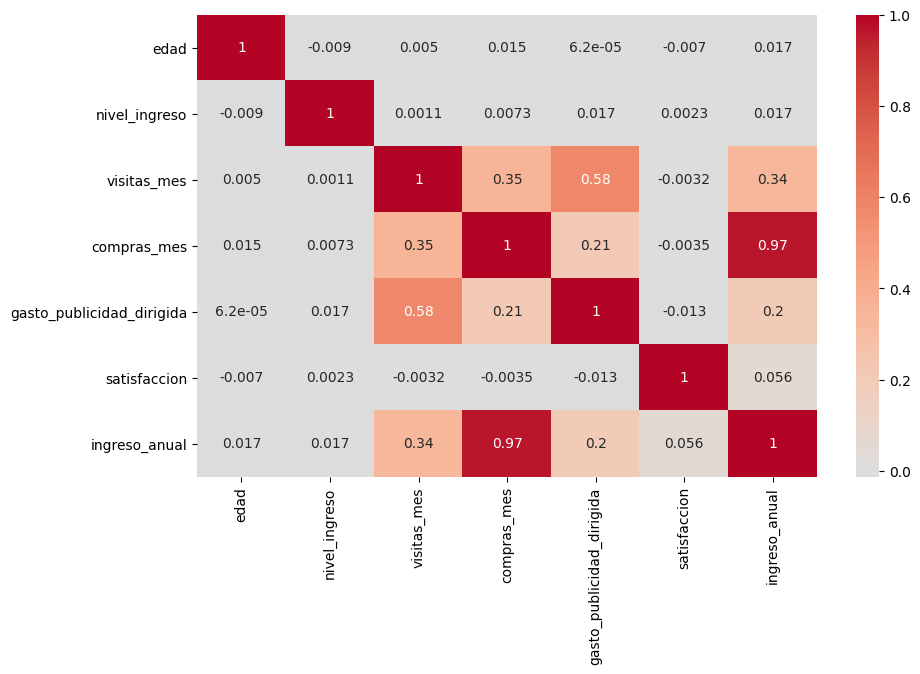

In [11]:
# Importar librerias
import seaborn as sns
import matplotlib.pyplot as plt
# Calcular matriz de correlación
matriz = df[columnas_numericas].corr()
# Visualizar la matriz de correlación para identificar relaciones
plt.figure(figsize=(10,6))
sns.heatmap(matriz, annot=True, cmap='coolwarm', center=0)


**Observaciones generales (Heatmap)**
- Se observa correlaciones moderadas entre **gasto_publicidad_dirigida** con **visitas_mes**, **compras_mes** e **ingreso_anual**; por otro lado, se observan correlaciones fuertes cercanas a 1.00 entre **Ingreso_anual y compras_mes** mismas que requieren de un proceso de análisis adicional para verificar que no supongan una posible colinealidad. El resto de variables muestran correlaciones débiles **cercanas a 0.00**.


**Observaciones respecto a `ingreso_anual`** 
- Presenta **correlación moderada con visitas_mes y gasto_publicidad_dirigida**, y correlación fuerte con **compras_mes**. Este último caso requiere de un proceso de análisis adicional con el fin de descartar una posible colinealidad.


### Scatterplot general

Las variables fueron seleccionadas debido a que comparten la misma unidad temporal ($/año), lo que permite comparar de manera consistente el ingreso estimado del cliente con el ingreso anual que éste genera para la empresa.

El gráfico de dispersión muestra una dispersión sensible, sin una tendencia lineal claramente definida, lo que sugiere la ausencia de una correlación significativa entre el nivel de ingresos estimado de los clientes y el volumen monetario que aportan a la empresa.

Este comportamiento indica que un mayor nivel de ingreso personal no necesariamente se asocia con una mayor generación de ingresos para la plataforma dentro de la muestra analizada. Como posible hipótesis interpretativa —sin implicar causalidad—, podría considerarse que parte de las compras se realizan mediante mecanismos de financiamiento o crédito, lo cual podría estar relacionado con características socioeconómicas específicas de los usuarios. No obstante, esta interpretación requiere análisis adicionales.

<AxesSubplot:xlabel='nivel_ingreso', ylabel='ingreso_anual'>

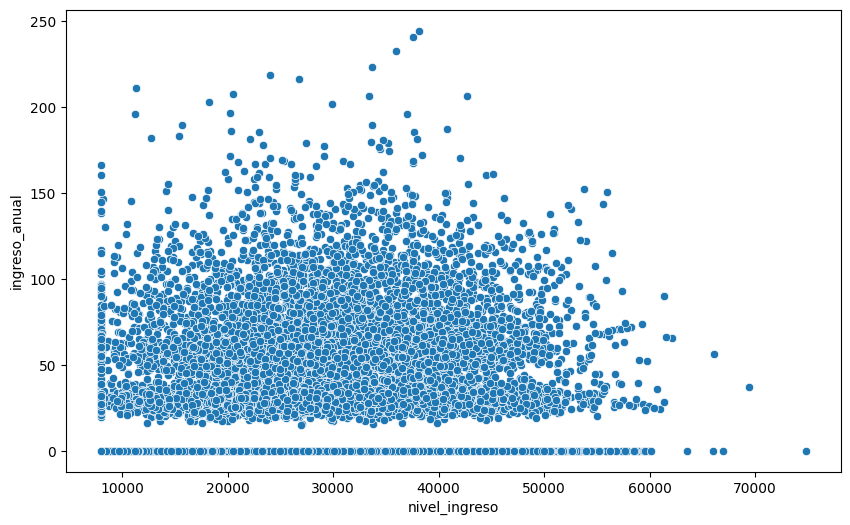

In [12]:
plt.figure(figsize = (10,6))
sns.scatterplot(data = df, x = 'nivel_ingreso', y= 'ingreso_anual')


### Scatterplot para pares clave

In [13]:
# Visualizar pares de variables con relaciones moderadas o fuertes
def grafico_dispersion(data_frame, col1, col2):
    sns.scatterplot(data = data_frame, x = col1, y = col2)
    sns.regplot(data = data_frame, x = col1, y = col2, scatter = False)

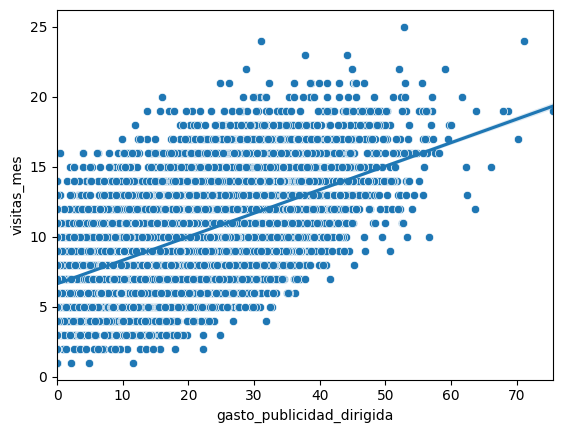

In [14]:
grafico_dispersion(df, 'gasto_publicidad_dirigida', 'visitas_mes')

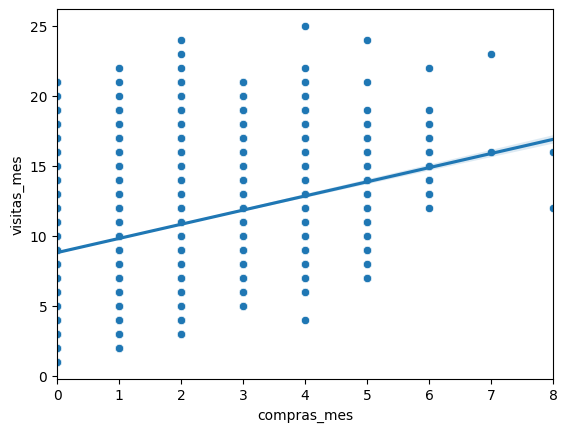

In [15]:
grafico_dispersion(df, 'compras_mes', 'visitas_mes')

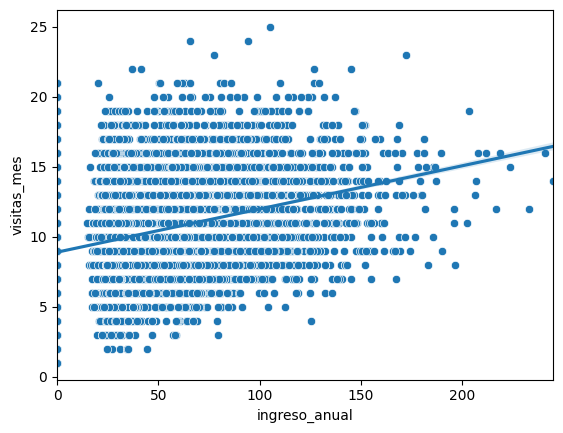

In [16]:
grafico_dispersion(df, 'ingreso_anual', 'visitas_mes')

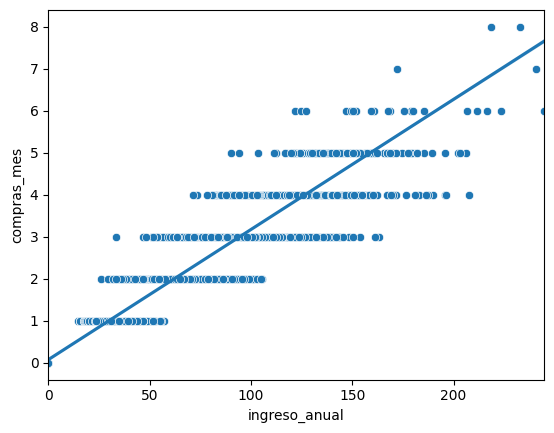

In [17]:
grafico_dispersion(df, 'ingreso_anual', 'compras_mes')

✍️ **Comentario**: Haz doble clic en este bloque y escribe tu diagnóstico.   
Incluye qué ves: dirección (positiva o negativa), dispersión (alta, media, baja), presencia de outliers y posible colinealidad.


Observaciones iniciales (Scatterplot)

**visitas_mes vs gasto_publicidad_dirigida**
- Dirección: Positiva
- Fuerza: Moderada
- Dispersión: media
- Outliers: Si

**visitas_mes vs compras_mes**
- Dirección: Positiva
- Fuerza: Moderada
- Dispersión: media
- Outliers: Si

**visitas_mes vs ingreso_anual**
- Dirección: Positiva
- Fuerza: Moderada
- Dispersión: media
- Outliers: Si

**compras_mes vs ingreso_anual**
- Dirección: Positiva
- Fuerza: Moderada (cercano a Fuerte)
- Dispersión: baja
- Outliers: No
- Posible Colinealidad

## Sección 4 - Coeficientes de correlación y evidencia numérica

En esta sección, se reportan coeficientes que respaldan los patrones
observados visualmente, utilizando el método adecuado según el tipo
de variables.

### Pearson / Spearman

In [18]:
# Calcular correlación entre variables relevantes
def correlacion(col1,col2):
    print(f'Coeficientes de correlación {col1} vs {col2}')
    print(f'Coeficiente Pearson:', df[col1].corr(df[col2],method = 'pearson'))
    print(f'Coeficiente Spearman:', df[col1].corr(df[col2],method = 'spearman'))
    print()

    

In [19]:
# Calcular correlación entre variables relevantes
correlacion('gasto_publicidad_dirigida','visitas_mes')
correlacion('compras_mes','visitas_mes')
correlacion('ingreso_anual','visitas_mes')
correlacion('ingreso_anual','compras_mes')

Coeficientes de correlación gasto_publicidad_dirigida vs visitas_mes
Coeficiente Pearson: 0.5789472719412827
Coeficiente Spearman: 0.5592673242622609

Coeficientes de correlación compras_mes vs visitas_mes
Coeficiente Pearson: 0.3538438947198978
Coeficiente Spearman: 0.33294292722789276

Coeficientes de correlación ingreso_anual vs visitas_mes
Coeficiente Pearson: 0.33714664324987453
Coeficiente Spearman: 0.3209536973769648

Coeficientes de correlación ingreso_anual vs compras_mes
Coeficiente Pearson: 0.9671485435708566
Coeficiente Spearman: 0.9674824920326731



**Observaciones de correlación**

**gasto_publicidad_dirigida** vs **visitas_mes**
- Dirección: positiva
- Magnitud: moderada - fuerte
- Colinealidad: No se observa colinealidad, pero si que la relación entre los valores es lineal y consistente.

**compras_mes** vs **visitas_mes**
- Correlación: positiva
- Magnitud: moderada
- Colinealidad: Las variables no presentan problemas de colinealidad. Se identifica una tendencia lineal moderada entre las variables (correlaciones 0.30-0.40), con comportamiento consistente entre métodos de análisis, aunque la alta variabilidad en los datos sugiere que otros factores también influyen en la relación.

**ingreso_anual** vs **visitas_mes**
- Correlación: positiva
- Magnitud: moderada
- Colinealidad: Las variables no presentan problemas de colinealidad. Se identifica una tendencia lineal moderada entre las variables (correlaciones 0.30-0.40), con comportamiento consistente entre métodos de análisis, aunque la alta variabilidad en los datos sugiere que otros factores también influyen en la relación.

**compras_mes** vs **ingreso_anual**
- Correlación: positiva
- Magnitud: Fuerte
- Colinealidad: La alta correlación entre ambos coeficientes puede ser un indicador de que ambas variables miden el mismo fenómeno, lo cual puede ser redundante para el análisis

### Punto-biserial

In [20]:
# Calcular correlación entre variables relevantes
from scipy.stats import pointbiserialr

def p_biserial(col1,col2):
    print(f'Punto biserial: {col1} vs {col2} ')
    print(pointbiserialr(df[col1],df[col2]))
    print()

p_biserial('abandono','ingreso_anual')
p_biserial('miembro_premium','ingreso_anual')

Punto biserial: abandono vs ingreso_anual 
SignificanceResult(statistic=-0.002823934021617148, pvalue=0.7294691719078393)

Punto biserial: miembro_premium vs ingreso_anual 
SignificanceResult(statistic=0.0930994396198015, pvalue=3.0943076155242597e-30)



**abandono vs ingreso_anual**

- Dirección: negativa
  
- Magnitud: Nula

**miembro_premium vs ingreso_anual** ⚠️

- Dirección: positiva

- Magnitud: Aunque la correlación es débil (0.093), existe una correlación positiva significativa entre membresía premium e ingreso anual, esto puede sugerir que la estrategia premium está funcionando en la dirección correcta, sin embargo, se recomienda profundizar en el análisis para validar la hipótesis.

### V de Cramer

In [21]:
# Función para calcular V de Cramér
from scipy.stats import chi2_contingency

def cramer_v(df,col1,col2):
    # Tabla de contingencia
    tabla = pd.crosstab(df[col1],df[col2])
    # Chi cuadrado
    chi2, p, dof, expected = chi2_contingency(tabla)
    # Cálculo de coeficiente V de cramer
    n = tabla.values.sum()
    v = np.sqrt(chi2 / (n * (min(tabla.shape) - 1)))
    print(f'Coeficiente V de Cramer: {col1} vs {col2}')
    return v

In [22]:
# Aplicar V de Cramér en variables relevantes
cramer_v(df,'tipo_dispositivo','region')


Coeficiente V de Cramer: tipo_dispositivo vs region


0.012378338407739397

In [23]:
cramer_v(df,'tipo_dispositivo','miembro_premium')

Coeficiente V de Cramer: tipo_dispositivo vs miembro_premium


0.01972543445542166

In [24]:
cramer_v(df,'tipo_dispositivo','abandono')

Coeficiente V de Cramer: tipo_dispositivo vs abandono


0.007245190431994803

In [25]:
cramer_v(df,'miembro_premium','region')

Coeficiente V de Cramer: miembro_premium vs region


0.012574183027958333

In [26]:
cramer_v(df,'abandono','region')

Coeficiente V de Cramer: abandono vs region


0.015429712175030079

✍️ **Observaciones V de Cramer**

La magnitud de la correlación es cercana a 0 (nula), lo que indica que las variables son prácticamente independientes, es decir, el tipo de dispositivo 
que usan los clientes no está relacionado con su región geográfica.


## Sección 5 - Interpretación de resultados para el negocio

### Hallazgo 1 — Variables con correlaciones Moderadas - Fuertes

**Evidencia visual:**   
**Evidencia numérica:** 
**Interpretación**  
**No podemos afirmar**  
**Implicación de negocio**  


<AxesSubplot:title={'center':'Evidencia Visual: Matriz de Correlación: Identificando Variables con Asociación Moderada-Fuerte'}>

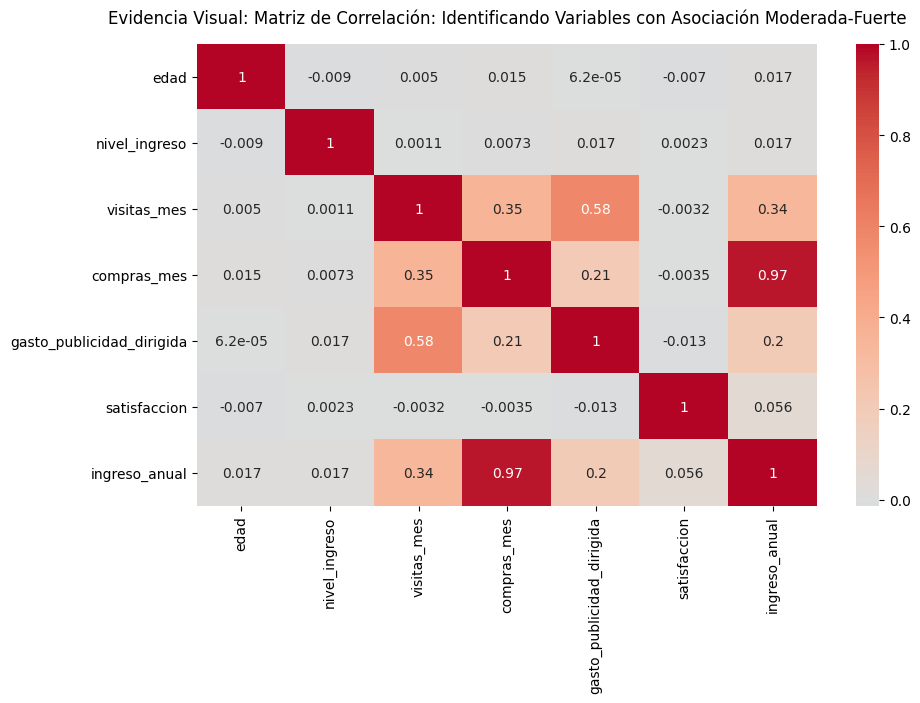

In [27]:
plt.figure(figsize=(10,6))
plt.title('Evidencia Visual: Matriz de Correlación: Identificando Variables con Asociación Moderada-Fuerte', 
          fontsize=12, pad=15)
sns.heatmap(matriz, annot=True, cmap='coolwarm', center=0)

**Evidencias.** Considerando los siguientes rangos de correlación: 
- +0.85 o superior: Relación muy fuerte positiva (posible colinealidad)
- +0.5 a +0.85: Relación moderada positiva
- +0.1 a +0.5: Relación débil positiva
- -0: Sin relación
- -0.1 a -0.5: Relación débil negativa
- -0.5 a -0.85: Relación moderada negativa
- -0.85 o inferior: Relación muy fuerte negativa

El Heatmap muestra que existen correlaciones débiles (0.1 a 0.5) en las siguientes variables:

- ingreso_anual vs visitas_mes
- ingreso_anual vs gasto_publicidad_dirigida
- compras_mes vs visitas_mes

Correlaciones fuertes en las variables:

- gasto_publicidad_dirigida vs visitas_mes

Y posible colinealidad en:
- ingreso_anual vs compras_mes

**Interpretación.**

Se observa que las principales variables del negocio que se mueven juntas en sentido positivo y con una magnitud de influencia Moderada entre si, son el *gasto en publicidad* y *las visitas mensuales*. Por otro lado se observan coeficientes de correlación débiles (pero existentes) entre el ingreso anual con las visitas mensuales y el gasto en publicidad. En resumen y puntualizando que en ningún momento de habla de causalidad si no de correlación entre variables, aquellas que se muestran comportamientos similares, son: ingreso_anual,visitas_mes y gasto_publicidad_dirigida

### Hallazgo 2 — Variables categóricas correlacionadas

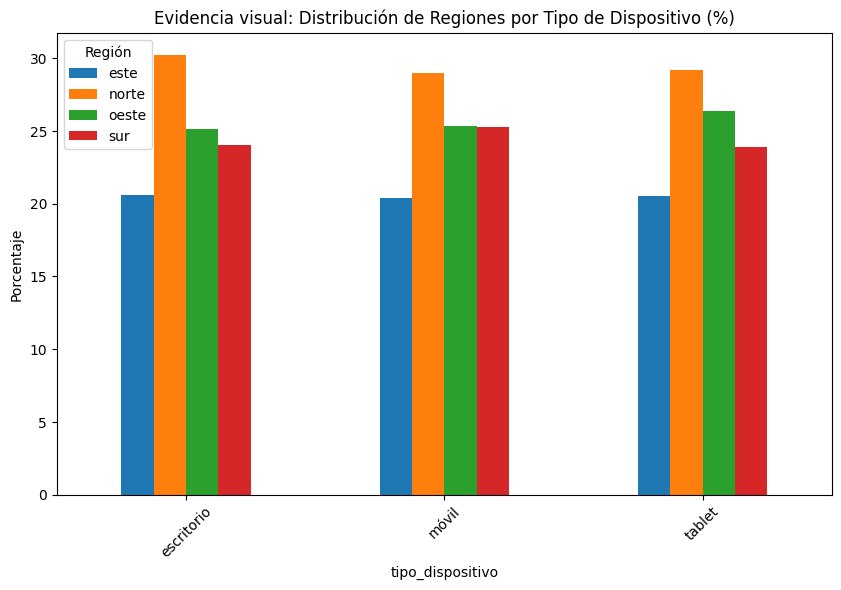

In [28]:
# Crear tabla de contingencia normalizada
tabla_norm = pd.crosstab(df['tipo_dispositivo'], df['region'], normalize='index') * 100

# Gráfico de barras
tabla_norm.plot(kind='bar', figsize=(10, 6))
plt.title('Evidencia visual: Distribución de Regiones por Tipo de Dispositivo (%)')
plt.ylabel('Porcentaje')
plt.xticks(rotation=45)
plt.legend(title='Región')
plt.show()

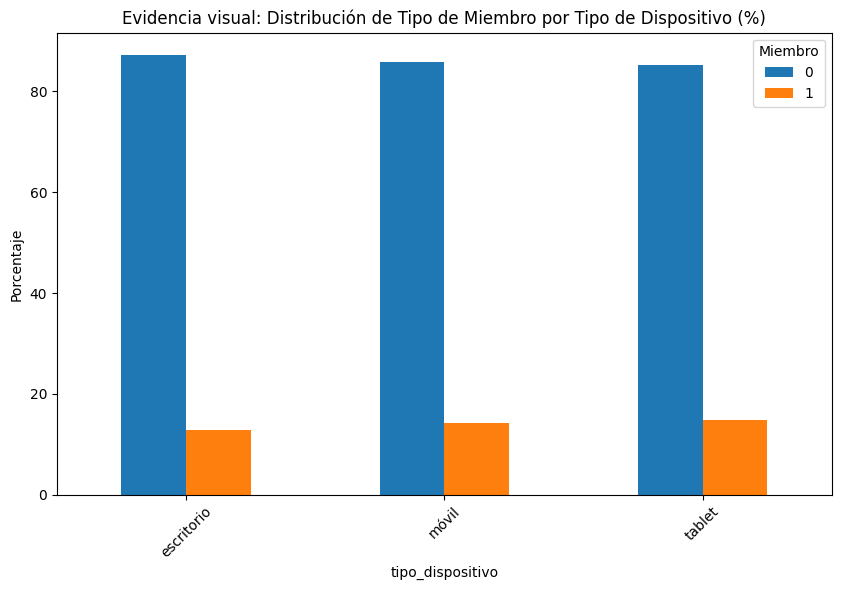

In [31]:
# Crear tabla de contingencia normalizada
tabla_norm = pd.crosstab(df['tipo_dispositivo'], df['miembro_premium'], normalize='index') * 100

# Gráfico de barras
tabla_norm.plot(kind='bar', figsize=(10, 6))
plt.title('Evidencia visual: Distribución de Tipo de Miembro por Tipo de Dispositivo (%)')
plt.ylabel('Porcentaje')
plt.xticks(rotation=45)
plt.legend(title='Miembro')
plt.show()

La evidencia en este dataset muestra un coeficiente V de Cramér relacionado a las variblaes **region** y **tipo_dispositivo** de *0.124*, lo que indica una asociación muy débil, lo mismo sucede con las variables **miembro_premium** y **tipo_dispositivo** que cuentan con un coeficiente V de Cramer de **0.197** (el coeficiente más alto en correlación de columnas categóricas). Los patrones observados en los gráficos sugieren que las frecuencias de los dispositivos son similares entre regiones, y por otro lado, entre tipos de miembros, lo cual es consistente con una baja asociación entre estas variables.

## Sección 6 - Limitaciones y próximos pasos

### **Limitaciones**
- Los coeficientes muestran asociación, no causa - efecto
- Los resultados aplican solamente a esta muestra específica
- Los datos pueden verse afectados por cambios en la economía, comportamiento de mercado y demás variables ajenas al análisis
- Un coeficiente de correlación de magnitud débil, no implica que no cuente con importancia técnica.

### **Próximos pasos** 



Analizar la asociación entre variables demográficas (edad y nivel_ingreso) y variables conductuales (visitas_mes, compras_mes y gasto_publicidad_dirigida), con el fin de identificar patrones de comportamiento y posibles relaciones estructurales dentro de la base de usuarios, sin establecer relaciones causales.

[Paso 2]
Agrupación demográfico conductual para reducir heterogeneidad y analizar correlaciones internas:
- edad en bins de 10 años
- nivel_ingreso (bajo, medio y alto) en función de percentiles
Realizar segmentación en base al comportamiento de los usuarios:
- visitas_mes: bajo, medio, y alto
- compras_mes: bajo, medio y alto (volumen de compras)
- miembro_premium: variable binaria


[Paso 3]

Correlaciones por variables demográficas y conductuales:
Análisis por:
- compras_mes vs nivel_ingreso ¿los usuarios con mayores ingresos compran más?
- visitas_mes vs invel_ingreso ¿existe correlación entre el nivel de ingresos y las visitas?
- gasto_publicidad_dirigida vs nivel_ingreso ¿la publicidad está dirigida a clientes con mayores ingresos?
- edad, nivel_ingreso ¿cuál es el segmento de edad con mayores ingresos?
- edad, compras_mes ¿la frecuencia de compras está relacionada con la edad?

